In [1]:
import numpy as np
from keras.datasets import reuters
from keras.utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt


# load the data
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 10000)


# prepare the data
def vectorize_data(x, dimension=10000):
  result = np.zeros((len(x), dimension))
  for i, word in enumerate(x):
    result[i, word] = 1
  return result

x_train = vectorize_data(X_train)
x_test = vectorize_data(X_test)

y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)


# partition train data into training set and validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


# build the NN
network = models.Sequential()
network.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'softmax'))

# choose loss function, optimizer, and target metrics
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])


# train the NN
history = network.fit(partial_x_train,
                     partial_y_train,
                     epochs = 20,
                     batch_size = 512,
                     validation_data = (x_val, y_val))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 164us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 140us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/

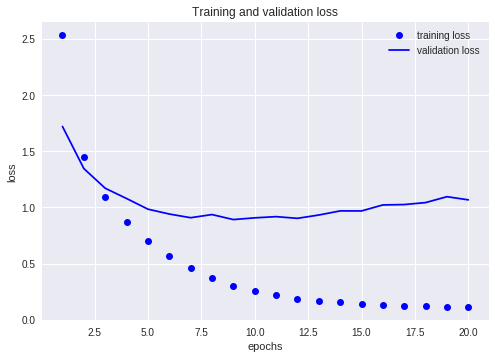

In [2]:
# plotting the training and validation loss

epochs = range(1,21)
plt.plot(epochs, history.history['loss'], 'bo', label = 'training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

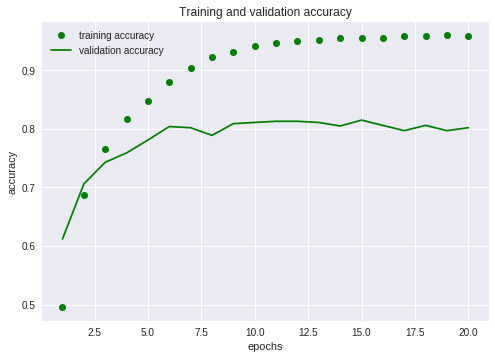

In [3]:
# plotting the training and validation accuracy

epochs = range(1,21)
plt.plot(epochs, history.history['acc'], 'go', label = 'training accuracy')
plt.plot(epochs, history.history['val_acc'], 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [4]:
# NN starts to overfit after about 9 epochs; 
# so we train NN from scratch for 9 epochs and using all training set

network.fit(x_train, y_train, epochs = 9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 1s 128us/step - loss: 0.2079 - acc: 0.9428
Epoch 2/9
8982/8982 [==============================] - 1s 127us/step - loss: 0.1677 - acc: 0.9470
Epoch 3/9
8982/8982 [==============================] - 1s 128us/step - loss: 0.1477 - acc: 0.9500
Epoch 4/9
8982/8982 [==============================] - 1s 132us/step - loss: 0.1352 - acc: 0.9525
Epoch 5/9
8982/8982 [==============================] - 1s 127us/step - loss: 0.1271 - acc: 0.9534
Epoch 6/9
8982/8982 [==============================] - 1s 127us/step - loss: 0.1226 - acc: 0.9544
Epoch 7/9
8982/8982 [==============================] - 1s 128us/step - loss: 0.1146 - acc: 0.9547
Epoch 8/9
8982/8982 [==============================] - 1s 142us/step - loss: 0.1136 - acc: 0.9547
Epoch 9/9
8982/8982 [==============================] - 1s 127us/step - loss: 0.1124 - acc: 0.9550


In [5]:
# test the NN

test_loss, test_accuracy = network.evaluate(x_test, y_test)
print('test_loss: ',test_loss)
print('test_accuracy: ', test_accuracy)

2246/2246 [==============================] - 0s 94us/step
test_loss:  1.3245905180223692
test_accuracy:  0.7773820124931454


In [6]:
# Use the NN for prediction

predictions = network.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[1]))
print(np.argmax(predictions[1]))

(46,)
1.0
10
